# Aufruf der Wikipedia-API

Die Dokumentation der Wikipedia-API findet sich hier: https://www.mediawiki.org/wiki/API:Main_page

Zur Abfrage von Daten mit action=query insbesondere hier: https://www.mediawiki.org/w/api.php?action=help&modules=query

### Zugriffszahlen für die Hamburg-Seite

Im Folgenden wird die Anzahl der Seitenaufrufe für die Hamburg-Seite bei der deutschen Wikipedia für die letzten 60 Tage angefragt.

Alle benötigten Bibliotheken importieren:

In [33]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import time
from datetime import datetime

URL für die API-Anfrage konstruieren:

In [34]:
url = "https://de.wikipedia.org/w/api.php" # API-Endpunkt
params = {
    "action": "query", # Was soll gemacht werden? Daten abrufen!
    "titles": "Hamburg", # Für welche Seite? Hamburg!
    "prop": "pageviews", # Welche Eigenschaft soll abgerufen werden? Seitenaufrufe pro Tag!
    "pvipdays": 60, # Für wie viele Tage sollen die Seitenaufrufe abgerufen werden? Für die letzten 60 Tage (= Maximum)!
    "format": "json" # In welchem Format sollen die abgerufenen Daten ausgegegben werden? Im JSON-Format!
}

API anfragen:

In [35]:
r = requests.get(url = url, params = params)
d = r.json()

Ein paar Checks:

In [36]:
print(r.url) # Welche URL wurde angefragt?
print(r.status_code) # Welcher HTTP-Status-Code wurde vom Web-Server zurückgemeldet?
print(r.reason) # Was bedeutet der Status-Code?

https://de.wikipedia.org/w/api.php?action=query&titles=Hamburg&prop=pageviews&pvipdays=60&format=json
200
OK


Die abgerufenen Daten wurden im JSON-Datenformat übertragen. Die Struktur der Daten ist wie folgt:

In [37]:
pprint(d)

{'batchcomplete': '',
 'query': {'pages': {'2129': {'ns': 0,
                              'pageid': 2129,
                              'pageviews': {'2023-02-17': 2361,
                                            '2023-02-18': 2373,
                                            '2023-02-19': 2968,
                                            '2023-02-20': 2658,
                                            '2023-02-21': 2543,
                                            '2023-02-22': 2449,
                                            '2023-02-23': 2532,
                                            '2023-02-24': 2454,
                                            '2023-02-25': 2545,
                                            '2023-02-26': 2772,
                                            '2023-02-27': 2946,
                                            '2023-02-28': 2417,
                                            '2023-03-01': 2288,
                                            '2023-03-02': 247

Datensatz erstellen:

In [42]:
data = d['query']['pages']['2129']['pageviews']
df = pd.DataFrame(data.items(), columns = ['Date', 'Views'])
df.head(35)

,Date,Views
0,2023-02-17,2361
1,2023-02-18,2373
2,2023-02-19,2968
3,2023-02-20,2658
4,2023-02-21,2543
5,2023-02-22,2449
6,2023-02-23,2532
7,2023-02-24,2454
8,2023-02-25,2545
9,2023-02-26,2772


Datensatz mit Abrufdatum im Dateinamen als CSV-Datei abspeichern:

In [40]:
date = datetime.now().strftime("%d_%m_%Y") # heutiges Datum
df.to_csv(f'views_HH_{date}.csv')

Daten plotten (y-Achse: Seitenaufrufe, x-Achse: Datum):

<AxesSubplot:xlabel='Date'>

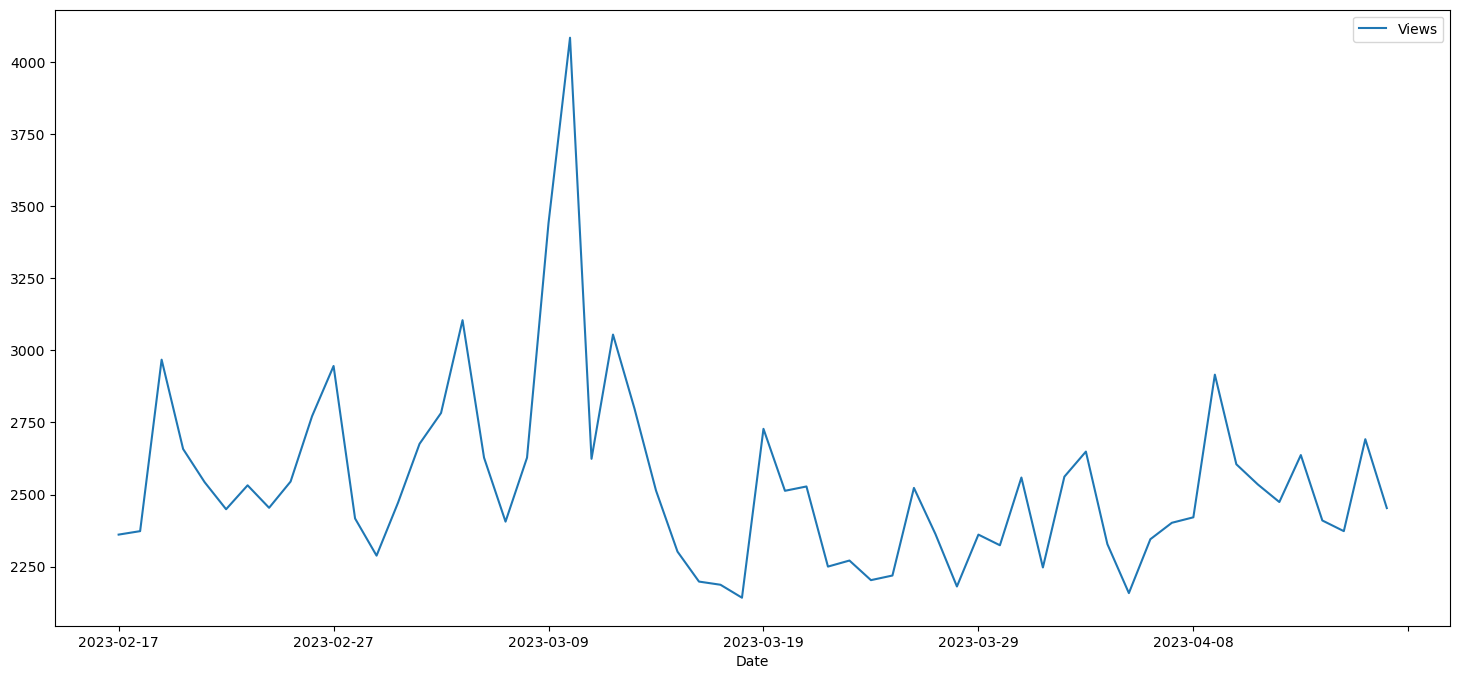

In [41]:
df.plot(x = 'Date', y = 'Views', figsize=(18,8))

### Zugriffszahlen für alle vier Millionenstädte in Deutschland

Schleife über alle vier Millionenstädte:

In [24]:
rows = []
cities = ['Berlin', 'Hamburg', 'Köln', 'München']

for c in cities:
    url = "https://de.wikipedia.org/w/api.php" # Endpunkt
    params = {
        "action": "query",
        "titles": c,
        "prop": "pageviews",
        "pvipdays": 60,
        "format": "json"
    }
    r = requests.get(url = url, params = params)
    d = r.json()
    c = d['query']['pages']
    rows.append(c)
    time.sleep(1)

In [25]:
pprint(rows)

[{'2552494': {'ns': 0,
              'pageid': 2552494,
              'pageviews': {'2023-02-17': 4024,
                            '2023-02-18': 3927,
                            '2023-02-19': 4865,
                            '2023-02-20': 4546,
                            '2023-02-21': 4276,
                            '2023-02-22': 4177,
                            '2023-02-23': 4455,
                            '2023-02-24': 4007,
                            '2023-02-25': 4355,
                            '2023-02-26': 4690,
                            '2023-02-27': 4395,
                            '2023-02-28': 4224,
                            '2023-03-01': 4584,
                            '2023-03-02': 4721,
                            '2023-03-03': 4109,
                            '2023-03-04': 4109,
                            '2023-03-05': 5024,
                            '2023-03-06': 4867,
                            '2023-03-07': 4562,
                            '202

Datensatz erstellen:

In [17]:
Berlin = rows[0]['2552494']['pageviews']
Hamburg = rows[1]['2129']['pageviews']
Köln = rows[2]['2648']['pageviews']
München = rows[3]['3215']['pageviews']

In [18]:
df_berlin = pd.DataFrame(Berlin.items(), columns = ['Date', 'Views'])
df_berlin['City'] = 'Berlin'
df_hamburg = pd.DataFrame(Hamburg.items(), columns = ['Date', 'Views'])
df_hamburg['City'] = 'Hamburg'
df_köln = pd.DataFrame(Köln.items(), columns = ['Date', 'Views'])
df_köln['City'] = 'Köln'
df_münchen = pd.DataFrame(München.items(), columns = ['Date', 'Views'])
df_münchen['City'] = 'München'

In [19]:
df = pd.concat([df_berlin, df_hamburg, df_köln, df_münchen], ignore_index = True)
df.head()

,Date,Views,City
0,2023-02-17,4024.0,Berlin
1,2023-02-18,3927.0,Berlin
2,2023-02-19,4865.0,Berlin
3,2023-02-20,4546.0,Berlin
4,2023-02-21,4276.0,Berlin


Datensatz mit Abrufdatum im Dateinamen als CSV-Datei abspeichern:

In [32]:
df.to_csv(f'views_B_HH_K_M_{date}.csv')

Daten plotten:

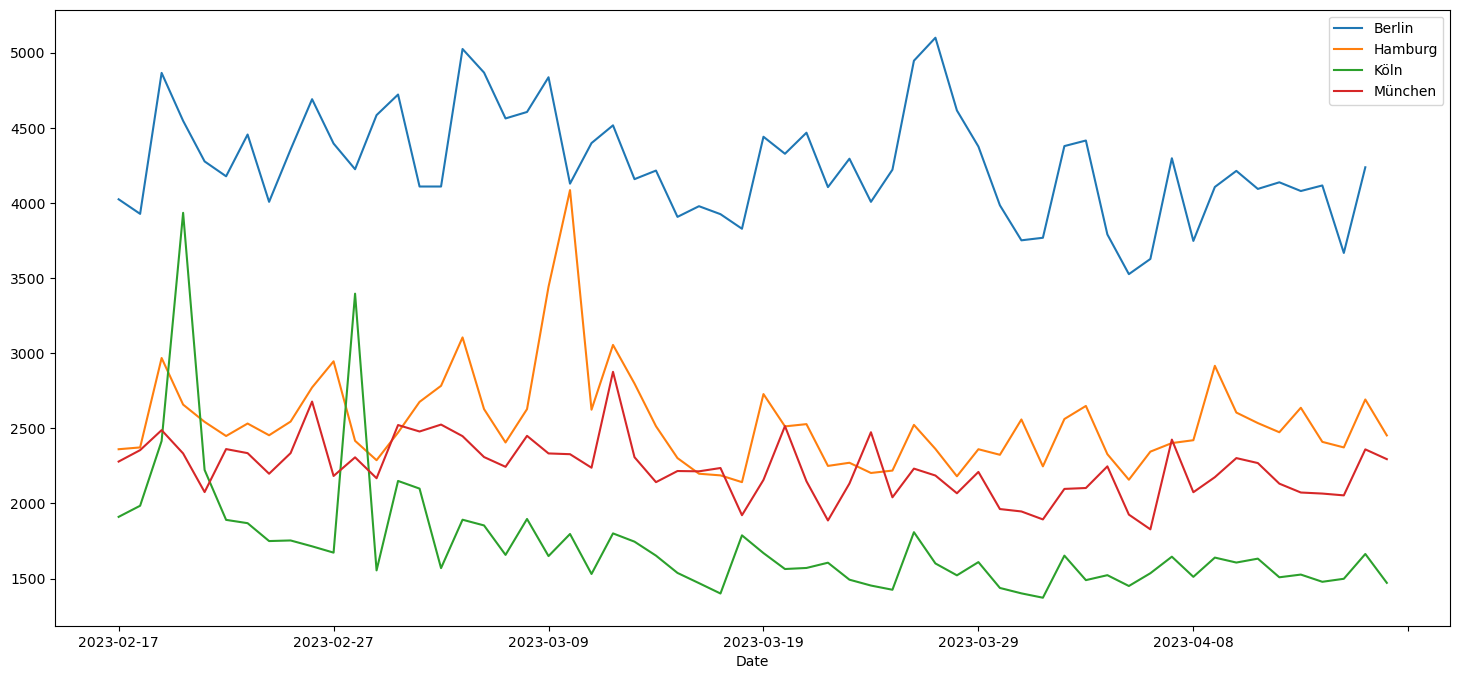

In [27]:
fig, ax = plt.subplots(figsize = (18,8))
df.groupby('City').plot(x = 'Date', y = 'Views', ax = ax)
plt.legend(df.groupby('City').groups.keys())